In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
# Q3 a

In [2]:
img1 = cv2.imread('Lab2_images/wheel.png')
img2 = cv2.imread('Lab2_images/toy.png')

In [3]:
def k_img(img,n):
    surf = cv2.xfeatures2d.SURF_create(n)
    gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    kp,ds = surf.detectAndCompute(gray_img,None)
    kp_img = cv2.drawKeypoints(img,kp,gray_img)
    kp_img = cv2.cvtColor(kp_img,cv2.COLOR_BGR2RGB)
    return kp,ds,kp_img

In [4]:
# keypoints descriptors image for wheel.png
kp1,ds1,kp_img1 = k_img(img1,400)
# keypoints descriptors image for toy.png
kp2,ds2,kp_img2 = k_img(img2,400)

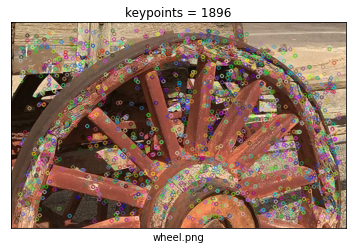

In [29]:
# display the image with its keypoints and the number of keypoints for wheel.png
t1 = 'keypoints = ' + str(len(kp1))
l1 = 'wheel.png'
plt.imshow(kp_img1)
plt.title(t1)
plt.xlabel(l1)
plt.xticks([])
plt.yticks([])
plt.savefig('Q3_a_wheel.png')
plt.show()

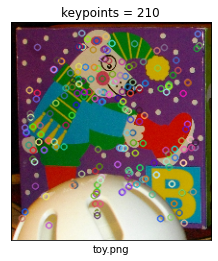

In [30]:
# display the image with its keypoints and the number of keypoints for toy.png

t2 = 'keypoints = ' + str(len(kp2))
l2 = 'toy.png'
plt.imshow(kp_img2)
plt.title(t2)
plt.xlabel(l2)
plt.xticks([])
plt.yticks([])
plt.savefig('Q3_a_toy.png')
plt.show()

In [7]:
# Q3 b

In [8]:
img0 = cv2.imread('Lab2_images/wagon.jpg')

In [9]:
kp0,ds0,kp_img0 = k_img(img0,400)

In [10]:
# original image match with wheel.png
bf1 = cv2.BFMatcher()
matches1 = bf1.knnMatch(ds1,ds0,k = 2)

# original image match with toy.png
bf2 = cv2.BFMatcher()
matches2 = bf2.knnMatch(ds2,ds0,k = 2)

In [11]:
good1 = []
good2 = []

In [12]:
for m,n in matches1:
    if m.distance <  0.75*n.distance:
        if [m] not in good1:
            good1.append([m])

In [13]:
for m,n in matches2:
    #print(m)
    if m.distance < 0.75*n.distance:
        if [m] not in good2:
            good2.append([m])

In [14]:
# percentage of matching descriptors for wheel.png
p_wheel = len(good1) / len(ds1)
p_wheel

0.9852320675105485

In [15]:
# percentage of matching descriptors for toy.png
p_toy = len(good2) / len(ds2)
p_toy

0.02857142857142857

In [24]:
# Q3 c

In [17]:
img3_wheel = cv2.drawMatchesKnn(kp_img1,kp1,kp_img0,kp0,good1,None,flags=2)

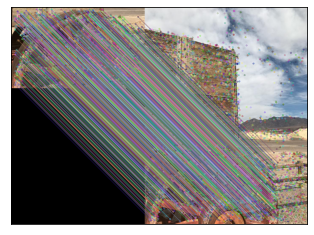

In [32]:
plt.imshow(img3_wheel)
plt.xticks([])
plt.yticks([])
plt.savefig('Q3_c_wheel.png')
plt.show()